<a href="https://colab.research.google.com/github/manjari-cse/Lung-Cancer-Nodule-detection/blob/main/attention_with_unet_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount('/content/driv')

Drive already mounted at /content/driv; to attempt to forcibly remount, call drive.mount("/content/driv", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/driv/MyDrive/dataset/attention unet ds/training',
                                          target_size=(100,100),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = train.flow_from_directory('/content/driv/MyDrive/dataset/attention unet ds/validation',
                                               target_size=(100,100),
                                               batch_size=3,
                                               class_mode='binary')

test_dataset = test.flow_from_directory('/content/driv/MyDrive/dataset/attention unet ds/testing',
                                               target_size=(100,100),
                                               batch_size=3,
                                               class_mode='binary')

Found 714 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'nodule': 0, 'non_nodule': 1}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid'),
                                    ])

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=0.001),
metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)             

In [ ]:
history = model.fit(train_dataset,
steps_per_epoch=25,
epochs=100,
verbose=1,
validation_data = validation_dataset,
validation_steps=10)

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.5317 - accuracy: 0.8933 - val_loss: 0.7972 - val_accuracy: 0.8333
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0777 - accuracy: 0.9467 - val_loss: 0.8016 - val_accuracy: 0.9000
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1338 - accuracy: 0.9600 - val_loss: 0.3194 - val_accuracy: 0.9000
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.3315 - accuracy: 0.9600 - val_loss: 0.3841 - val_accuracy: 0.8667
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0802 - accuracy: 0.9733 - val_loss: 0.5830 - val_accuracy: 0.8667
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 0.1332 - accuracy: 0.9200 - val_loss: 0.2377 - val_accuracy: 0.8667
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.2682 - accuracy: 0.9067 - val_loss: 0.2649 - val_accuracy: 0.9000
Epoch 

In [ ]:
model.evaluate(train_dataset)

238/238 [==============================] - 1s 6ms/step - loss: 8.8314e-09 - accuracy: 1.0000


[8.83140938157112e-09, 1.0]

In [ ]:
score = model.evaluate(validation_dataset, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 3.478353261947632 / Test accuracy: 0.8799999952316284


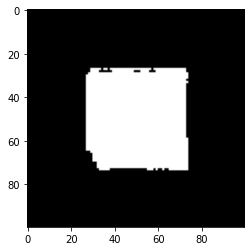

[[0.]]
nodule


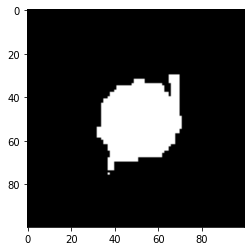

[[0.]]
nodule


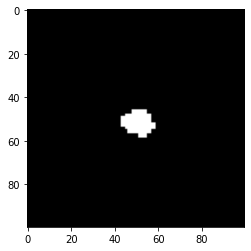

[[0.]]
nodule


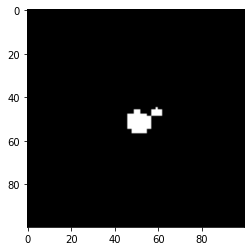

[[0.]]
nodule


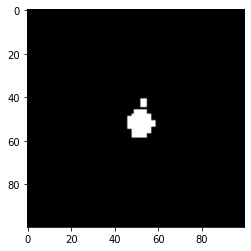

[[0.]]
nodule


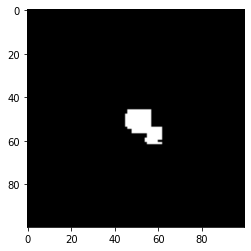

[[0.]]
nodule


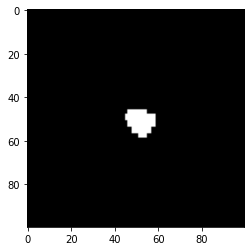

[[0.]]
nodule


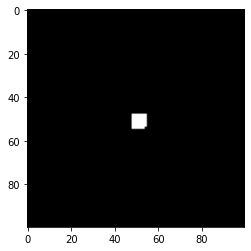

[[0.]]
nodule


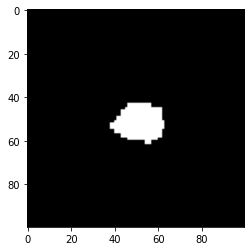

[[0.]]
nodule


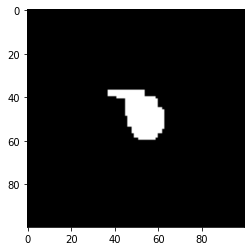

[[0.]]
nodule


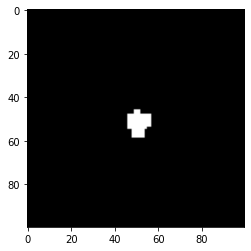

[[0.]]
nodule


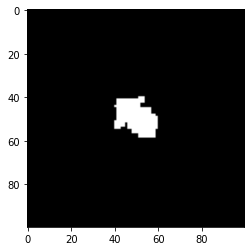

[[0.]]
nodule


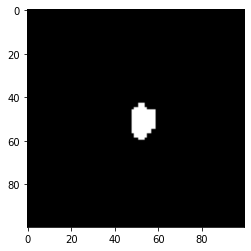

[[0.]]
nodule


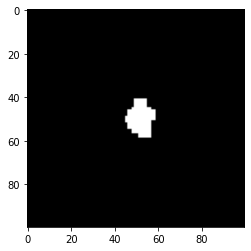

[[0.]]
nodule


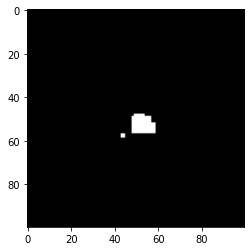

[[0.]]
nodule


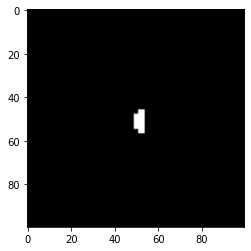

[[0.]]
nodule


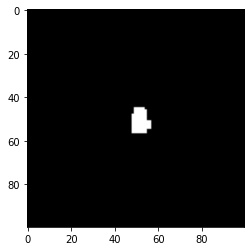

[[0.]]
nodule


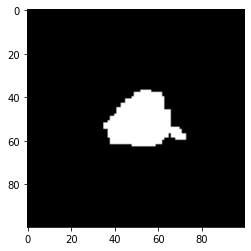

[[0.]]
nodule


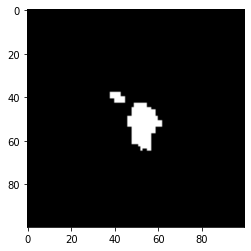

[[0.]]
nodule


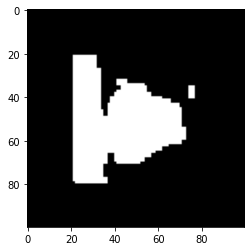

[[0.]]
nodule


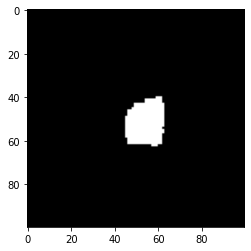

[[0.]]
nodule


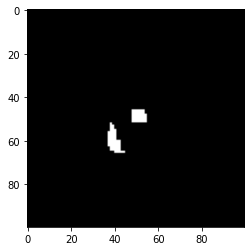

[[0.]]
nodule


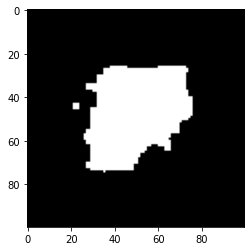

[[0.]]
nodule


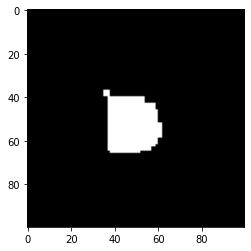

[[0.]]
nodule


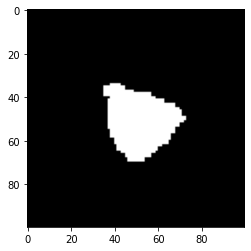

[[0.]]
nodule


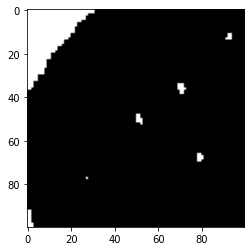

[[1.]]
Non_nodule


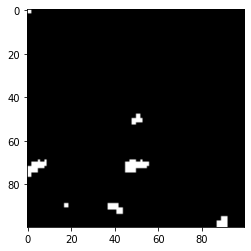

[[0.]]
nodule


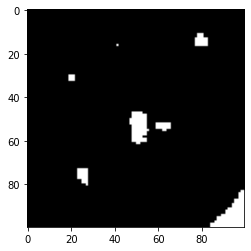

[[1.]]
Non_nodule


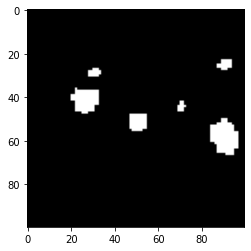

[[1.]]
Non_nodule


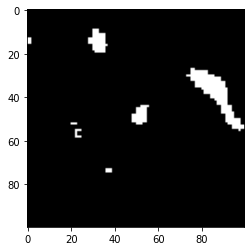

[[1.]]
Non_nodule


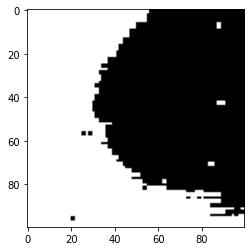

[[1.]]
Non_nodule


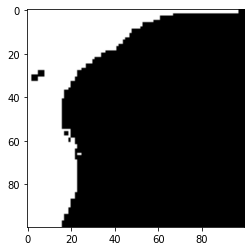

[[1.]]
Non_nodule


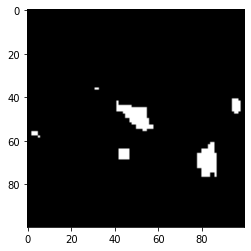

[[1.]]
Non_nodule


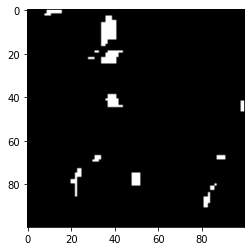

[[1.]]
Non_nodule


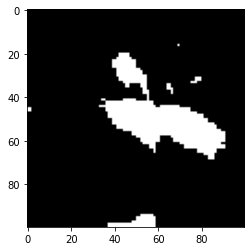

[[0.]]
nodule


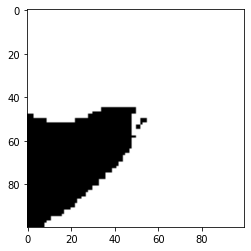

[[1.]]
Non_nodule


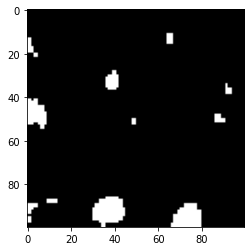

[[1.]]
Non_nodule


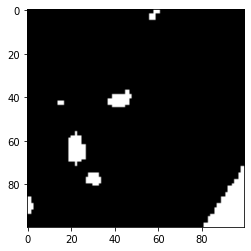

[[1.]]
Non_nodule


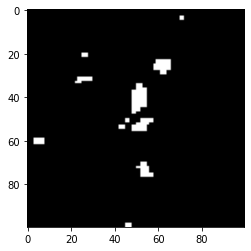

[[1.]]
Non_nodule


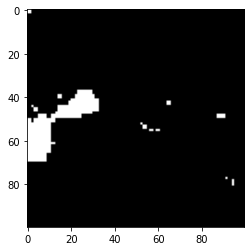

[[1.]]
Non_nodule


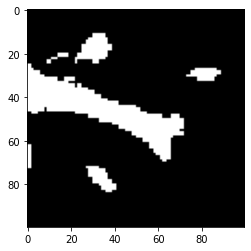

[[1.]]
Non_nodule


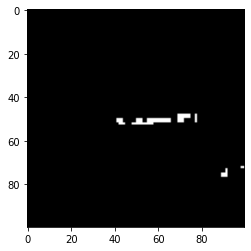

[[1.]]
Non_nodule


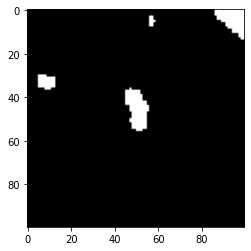

[[1.]]
Non_nodule


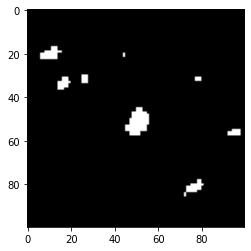

[[1.]]
Non_nodule


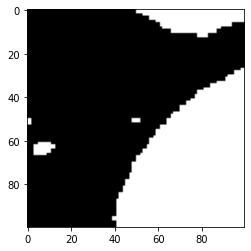

[[1.]]
Non_nodule


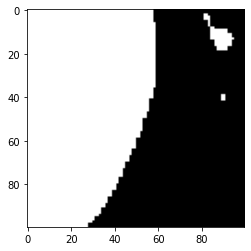

[[1.]]
Non_nodule


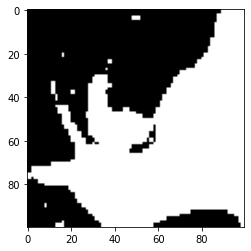

[[1.]]
Non_nodule


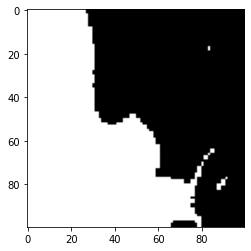

[[1.]]
Non_nodule


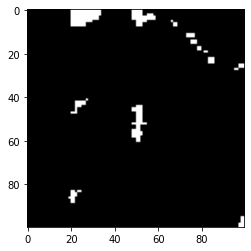

[[1.]]
Non_nodule


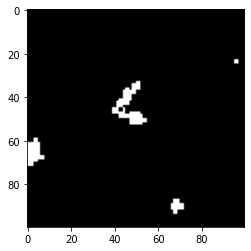

[[1.]]
Non_nodule


In [ ]:
dir_path = "/content/driv/MyDrive/dataset/attention unet ds/testing/nodule"
pre=[]
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+"/"+i,target_size=(100,100))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)
  images = np.vstack([x])
  val = model.predict(images)
  pre.append(val)
  print(val)
  if val==0:
    print("nodule")
  else:
    print("Non_nodule")
dir_path = "/content/driv/MyDrive/dataset/attention unet ds/testing/non_nodule"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+"/"+i,target_size=(100,100))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)
  images = np.vstack([x])
  val = model.predict(images)
  pre.append(val)
  print(val)
  if val==0:
    print("nodule")
  else:
    print("Non_nodule")

In [ ]:
p=[]
for i in range(0,50):
  if(pre[i][0][0]==0):
    p.append(0)
  else:
    p.append(1)

  
print(p)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
STEP_SIZE_TEST=validation_dataset.n//validation_dataset.batch_size
validation_dataset.reset()
preds = model.predict(test_dataset,verbose=1)
print(STEP_SIZE_TEST)

17/17 [==============================] - 0s 6ms/step
16


In [ ]:
STEP_SIZE_TEST=validation_dataset.n//validation_dataset.batch_size
validation_dataset.reset()
preds = model.predict(test_dataset,verbose=1)
print(STEP_SIZE_TEST)

17/17 [==============================] - 0s 5ms/step
16


In [ ]:
validation_dataset.classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

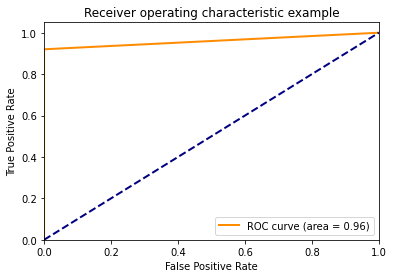

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(test_dataset.classes, p)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_true=test_dataset.classes, y_pred=p)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[25  0]
 [ 2 23]]


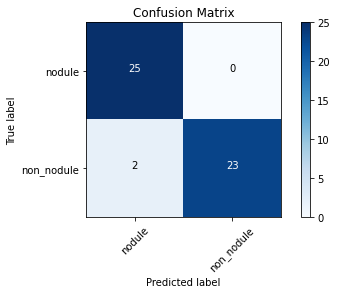

In [ ]:
cm_plot_labels = ['nodule','non_nodule']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# define actual
precision = precision_score(test_dataset.classes, p, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

recall = recall_score(test_dataset.classes, p, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(test_dataset.classes, p, average='binary')
print('F-Measure: %.3f' % score)

Precision: 1.000
Recall: 0.920
F-Measure: 0.958
